In [17]:
from arcgis.gis import GIS, Item
from uuid import uuid4

In [2]:
username = 'joel_mccune'
access_item_id = '95c2eceb802c41d8b605b2d431c7547e'

In [4]:
gis = GIS(username=username)
gis

In [5]:
sdf = Item(gis, access_item_id).layers[0].query().df

In [6]:
sdf.head()

,OBJECTID,collection_method,created_date,created_user,difficulty,difficulty_max,difficulty_min,difficulty_outlier,last_edited_date,last_edited_user,name,name_common,name_river,name_section,nav_link_aw,notes,reach_id,side_of_river,type,SHAPE
0,1,None,None,None,III+(V+),III+,None,V+,None,None,None,None,Alsek,Haines Junction to Dry Bay,http://www.americanwhitewater.org/content/Rive...,None,1,None,putin,"{'x': -137.50599999999997, 'y': 60.74600000000..."
1,2,None,None,None,I-IV,IV,I,None,None,None,None,None,Aniakchak,Surprise Lake to Aniakchak Bay,http://www.americanwhitewater.org/content/Rive...,None,2,None,putin,"{'x': -158.08099999999996, 'y': 56.90600000000..."
2,3,None,None,None,III,III,None,None,None,None,None,None,Browns Creek,Browns Creek Canyon,http://www.americanwhitewater.org/content/Rive...,None,3,None,putin,"{'x': -145.91399999999996, 'y': 60.95420000000..."
3,4,None,None,None,IV,IV,None,None,None,None,None,None,Canyon Creek,Seward Highwy at outlet of Lower Summit Lake t...,http://www.americanwhitewater.org/content/Rive...,None,4,None,putin,"{'x': -149.47601899599997, 'y': 60.66575888800..."
4,5,None,None,None,III,III,None,None,None,None,None,None,Charley,Upper river gravel bar to Yukon River to Circle,http://www.americanwhitewater.org/content/Rive...,None,5,None,putin,"{'x': -143.2228755, 'y': 64.56171038700006, 's..."


In [7]:
sdf.to_csv('./access_raw20180612.csv')

In [15]:
sdf.columns

Index(['OBJECTID', 'collection_method', 'update_date', 'created_user',
       'difficulty', 'difficulty_maximum', 'difficulty_minimum',
       'difficulty_outlier', 'last_edited_date', 'last_edited_user', 'name',
       'name_common', 'name_river', 'name_section', 'nav_link_aw', 'notes',
       'reach_id', 'side_of_river', 'subtype', 'SHAPE', 'point_type',
       'description'],
      dtype='object')

In [14]:
sdf.head()

,OBJECTID,collection_method,update_date,created_user,difficulty,difficulty_maximum,difficulty_minimum,difficulty_outlier,last_edited_date,last_edited_user,...,name_river,name_section,nav_link_aw,notes,reach_id,side_of_river,subtype,SHAPE,point_type,description
0,1,None,None,None,III+(V+),III+,None,V+,None,None,...,Alsek,Haines Junction to Dry Bay,http://www.americanwhitewater.org/content/Rive...,None,1,None,putin,"{'x': -137.50599999999997, 'y': 60.74600000000...",access,none
1,2,None,None,None,I-IV,IV,I,None,None,None,...,Aniakchak,Surprise Lake to Aniakchak Bay,http://www.americanwhitewater.org/content/Rive...,None,2,None,putin,"{'x': -158.08099999999996, 'y': 56.90600000000...",access,none
2,3,None,None,None,III,III,None,None,None,None,...,Browns Creek,Browns Creek Canyon,http://www.americanwhitewater.org/content/Rive...,None,3,None,putin,"{'x': -145.91399999999996, 'y': 60.95420000000...",access,none
3,4,None,None,None,IV,IV,None,None,None,None,...,Canyon Creek,Seward Highwy at outlet of Lower Summit Lake t...,http://www.americanwhitewater.org/content/Rive...,None,4,None,putin,"{'x': -149.47601899599997, 'y': 60.66575888800...",access,none
4,5,None,None,None,III,III,None,None,None,None,...,Charley,Upper river gravel bar to Yukon River to Circle,http://www.americanwhitewater.org/content/Rive...,None,5,None,putin,"{'x': -143.2228755, 'y': 64.56171038700006, 's...",access,none


In [20]:
sdf['uid'] = sdf.uid.apply(lambda val: uuid4().hex)

In [24]:
def get_type_id(row):
    id_list = ['null' if val is None else val for val in [row.reach_id, row.point_type, row.subtype]]
    return '_'.join(id_list)

sdf['type_id'] = sdf.apply(lambda row: get_type_id(row), axis=1)

In [31]:
sdf['update_notes'] = ''

In [59]:
sdf_filtered = sdf[['reach_id', 'point_type', 'uid', 'subtype', 'name', 'side_of_river', 'collection_method', 'update_date', 'update_notes', 'notes', 'type_id', 'SHAPE']]

In [60]:
sdf_filtered.to_csv('access_reformatted20180612.csv')

In [61]:
sdf_filtered = sdf[['reach_id', 'point_type', 'uid', 'subtype', 'name', 'side_of_river', 'collection_method', 'update_notes', 'notes', 'type_id', 'SHAPE']]

In [70]:
fs = sdf_filtered.to_featureset()

<Item title:"aw_reach_points" type:Feature Layer Collection owner:joel_mccune>
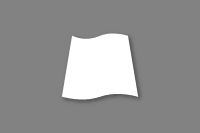

In [63]:
new_item = Item(gis, 'dd84717e78a74945a1345901d4701250')
new_item

In [64]:
new_layer = new_item.layers[0]

In [72]:
new_layer.edit_features(adds=fs)

HTTPError: HTTP Error 500: Internal Server Error

In [68]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    if html is None:
        return None
    else:
        s = MLStripper()
        s.feed(html)
        return s.get_data()

In [69]:
sdf_filtered.notes = sdf_filtered.notes.apply(lambda val: strip_tags(val))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
